In [68]:
# Importing the various libraries/tools needed for my analysis.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

fig=plt.figure()


<Figure size 432x288 with 0 Axes>

In [26]:
# Importing the Wisconsin Breast cancer dataset from Scikit learn.

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# No missing values are found within the data, therefore polishing/cleaning step is unnecessary.

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [63]:
# I added the target, malignant or benign, as it made it easier to visualise. 
#This was done by modifying code written by Chris Tran, chriskhanhtran.github.io. 

df_target = pd.DataFrame(data.target, columns=['target'])
dft = pd.concat([df, df_target], axis=1)
dft['target'] = dft['target'].apply(lambda x: "Benign"
                                  if x == 1 else "Malignant")

Numerical_df = pd.DataFrame(np.c_[data['data'],data['target']],
             columns = np.append(data['feature_names'], ['target']))

dft.head()
#Numerical_df.head(30)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [6]:
#Splits the dataset to malignant and benign diagnoses.
separator = 0.5
Malignant_df = Numerical_df[Numerical_df['target'] < separator]
Benign_df = Numerical_df[Numerical_df['target'] > separator]

Benign_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1.0
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1.0
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1.0
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1.0
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1.0
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1.0
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1.0
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1.0


C:\Users\sga46\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


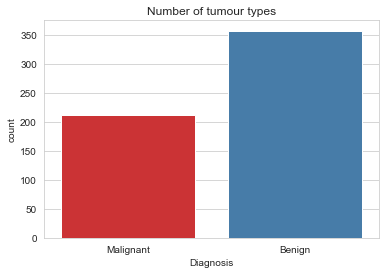

In [7]:
# Plot a graph to gain an idea of how many patients were diagnsed with a malignant or benign tumour.

sns.set_style('whitegrid')
dft['target'].value_counts()
sns.countplot(dft['target'], palette = 'Set1')
plt.xlabel('Diagnosis')
plt.title('Number of tumour types')
plt.savefig('Count.png', dpi=300)

<AxesSubplot:>

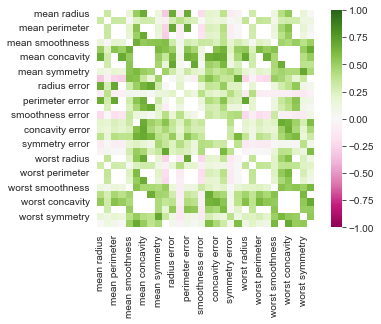

In [86]:
#Correlation in the total dataset.
dft_corr = dft.corr()
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(dft_corr[dft_corr<0.7], vmin=-1.0, vmax=1.0, square=True, cmap='PiYG')

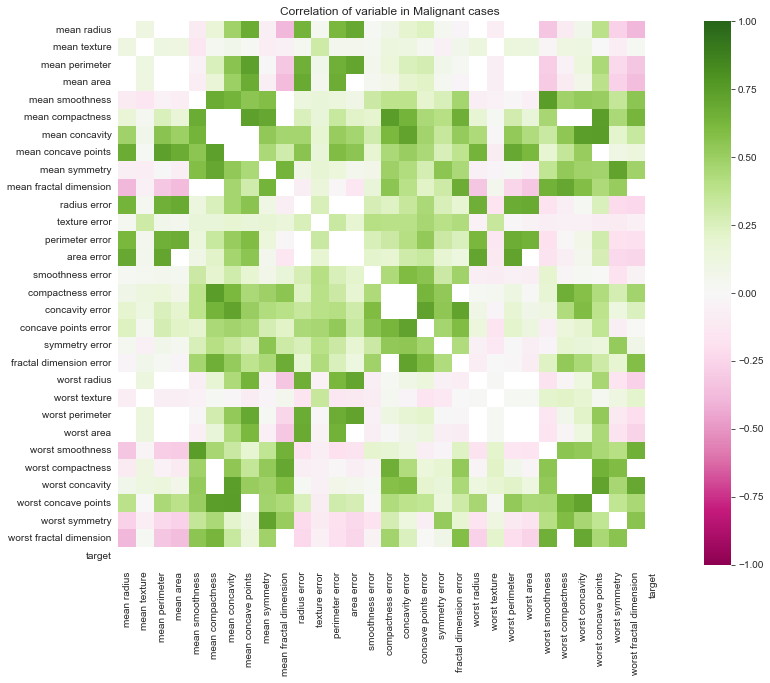

In [87]:
# Correlation heatmap for just malignant cases. Variables with high correlation points are removed. By definition, 
# points such as radius and perimeter are going to have high correlation.

Malignant_corr = Malignant_df.corr()

plt.figure(figsize=(15, 10))
#cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(Malignant_corr[Malignant_corr<0.75], vmin=-1.0, vmax=1.0, square=True, cmap='PiYG')
plt.title('Correlation of variable in Malignant cases')
plt.savefig('Mal_Corr.png', dpi=300)

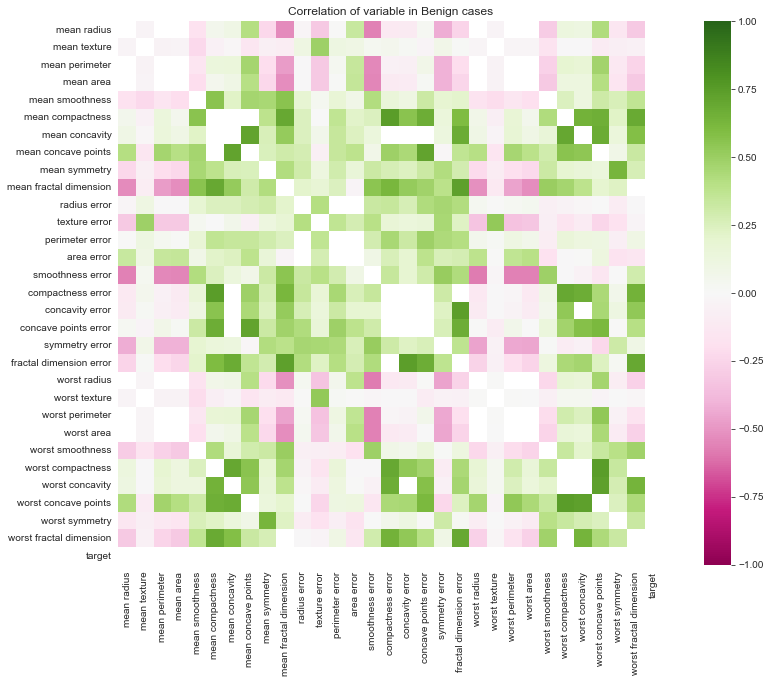

In [88]:
#Correlation heatmap for just Benign cases.High correlation is again removed.

Benign_corr = Benign_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(Benign_corr[Benign_corr<0.75], vmin=-1.0, vmax=1.0, square=True, cmap='PiYG')
plt.title('Correlation of variable in Benign cases')
plt.savefig('Benign_corr.png', dpi=300)

C:\Users\sga46\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


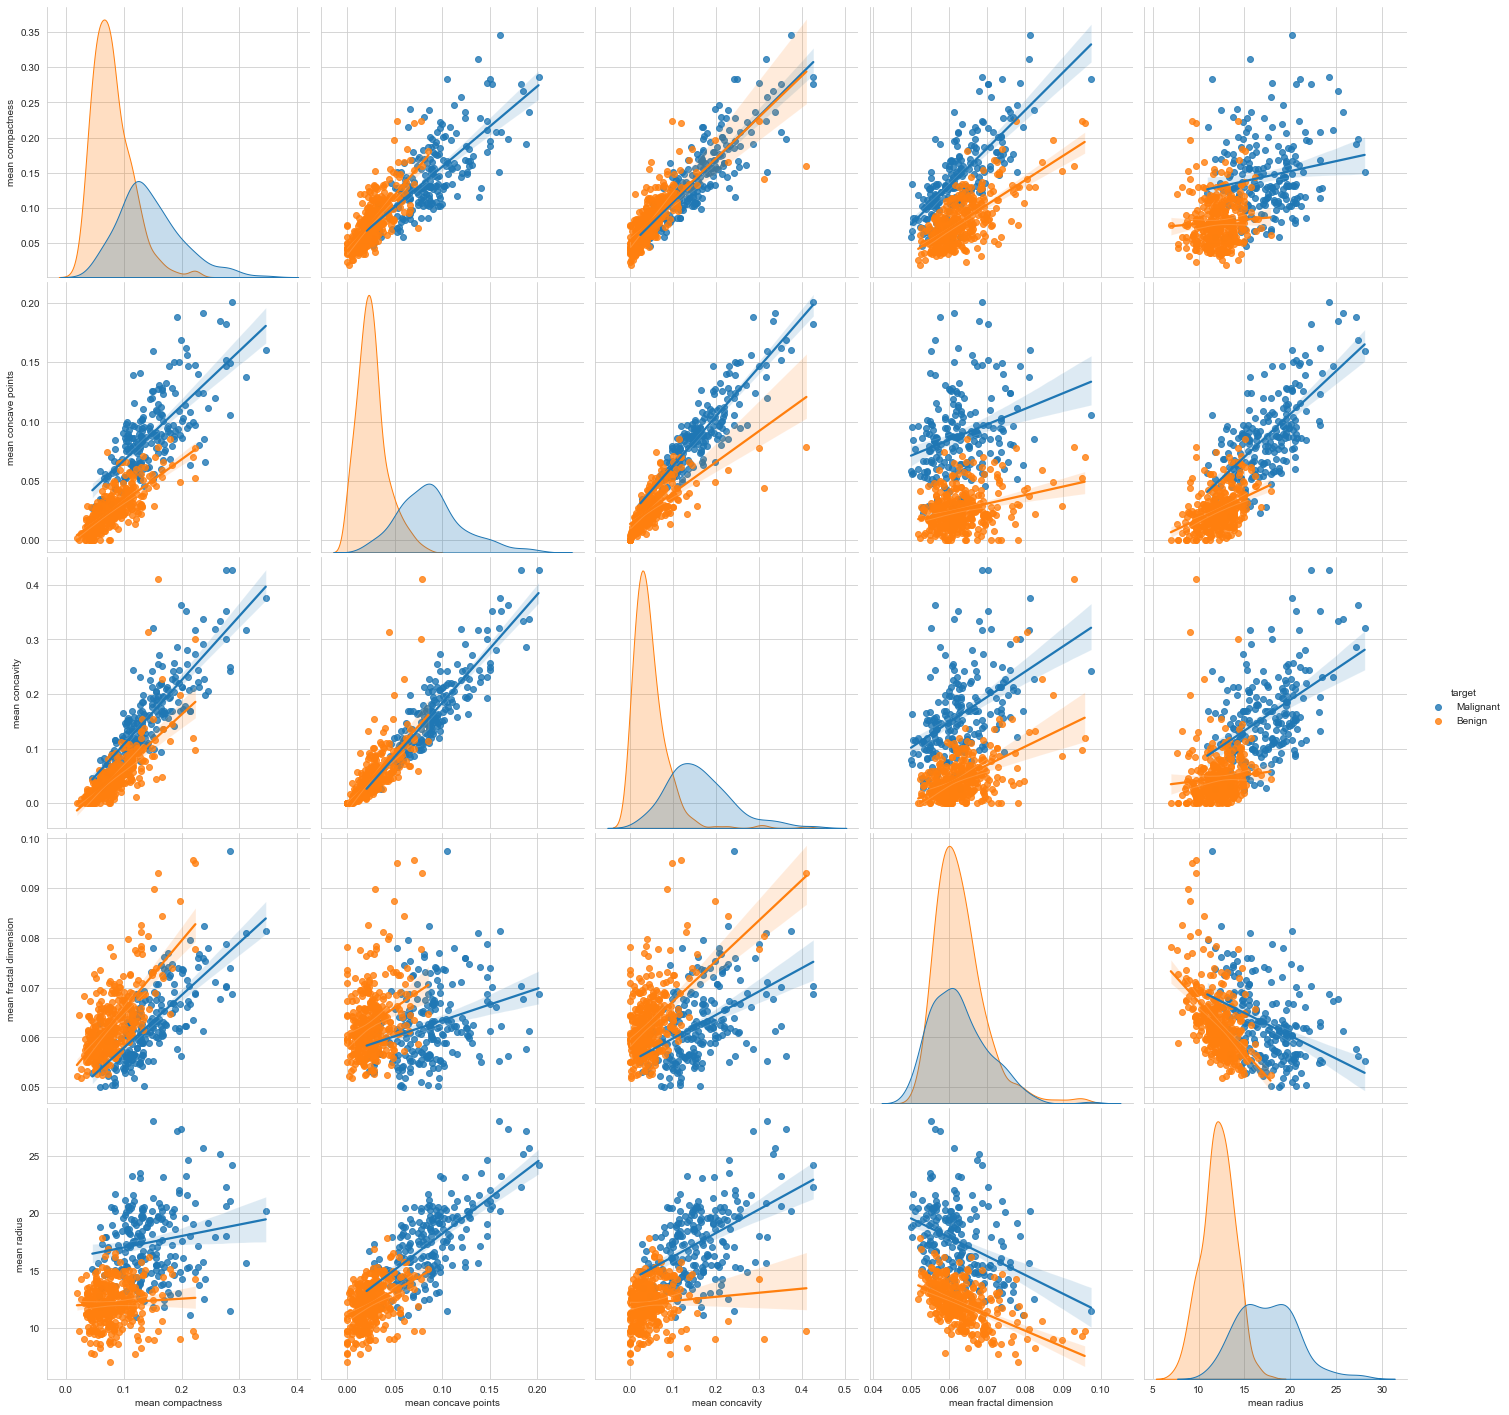

In [89]:
#This plot compares all the variables that showed interesting correlation as determined by eye (darker green from plot above)
Interesting_variables_plot = dft[['mean compactness','mean concave points','mean concavity','mean fractal dimension', 
                                  'mean radius','target']]
sns.pairplot(Interesting_variables_plot, hue='target', size = 4, kind="reg")
plt.savefig('interesting pairplots', dpi=300)

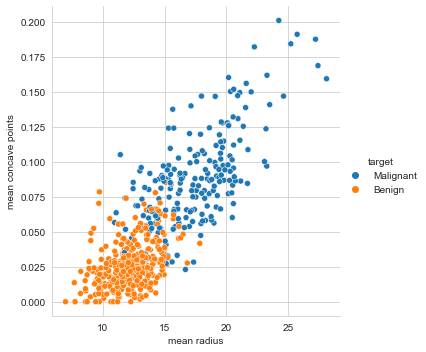

In [19]:
#Scatter plot to study certain points in detail - eg mean concave points and mean radius.
sns.relplot(data=dft, x="mean radius", y='mean concave points', hue="target")

In [60]:
#Train a model
X = Numerical_df.iloc[:, 1:30].values
Y = Numerical_df.iloc[:, 30].values
y = Numerical_df.iloc[:, 30].values

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [90]:
#apply the training set to a logistic regression model.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000000)
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=1000000)

In [91]:
Y_pred = classifier.predict(X_test)

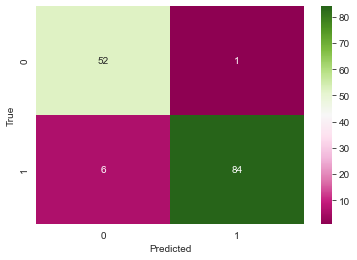

In [92]:
#Plot a confusion matrix to compare outcomes of model prediction vs real values.
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,annot=True,cmap='PiYG')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('cm.png',dpi=300)


In [82]:
#determine accuracy for the model. Value was 95.1%
accuracy_score(Y_test,Y_pred)

0.951048951048951

In [61]:
#create a second algorithm - kneighbours.
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [83]:
Yn_pred = model.predict(X_test)

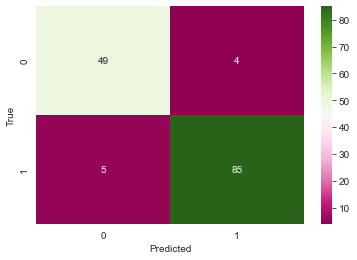

In [84]:
cm = confusion_matrix(Y_test, Yn_pred)
sns.heatmap(cm,annot=True,cmap='PiYG')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('cm.png',dpi=300)


In [85]:
accuracy_score(Y_test,Yn_pred)

0.9370629370629371